# Introduction

## Imports and Setup

In [1]:
# Imports and Setup
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure the backend is set for plt if needed
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ensure inline plots for Kaggle
%matplotlib inline

# For reproducibility
np.random.seed(42)

print('Imports and setup complete.')

Imports and setup complete.


### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv('cybersecurity_intrusion_data.csv')

# Display the first few rows
df.shape

(9537, 11)

## Data Exploration

In [3]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [4]:
print('Data Types:\n', df.dtypes)
print('\nMissing Values:\n', df.isnull().sum())

Data Types:
 session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

Missing Values:
 session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


## Data Cleaning and Preprocessing

In [5]:
# Drop any duplicates if necessary
df.drop_duplicates(inplace=True)

# For our predictive modeling, we do not need session_id (string identifier).
if 'session_id' in df.columns:
    df.drop('session_id', axis=1, inplace=True)

# Identify categorical columns
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

# Use pd.get_dummies to encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the transformed dataframe info
df.info()

# Check for any remaining missing values
print('Missing values after preprocessing:', df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   network_packet_size   9537 non-null   int64  
 1   login_attempts        9537 non-null   int64  
 2   session_duration      9537 non-null   float64
 3   ip_reputation_score   9537 non-null   float64
 4   failed_logins         9537 non-null   int64  
 5   unusual_time_access   9537 non-null   int64  
 6   attack_detected       9537 non-null   int64  
 7   protocol_type_TCP     9537 non-null   bool   
 8   protocol_type_UDP     9537 non-null   bool   
 9   encryption_used_DES   9537 non-null   bool   
 10  browser_type_Edge     9537 non-null   bool   
 11  browser_type_Firefox  9537 non-null   bool   
 12  browser_type_Safari   9537 non-null   bool   
 13  browser_type_Unknown  9537 non-null   bool   
dtypes: bool(7), float64(2), int64(5)
memory usage: 586.9 KB
Missing values a

## Data Visualization

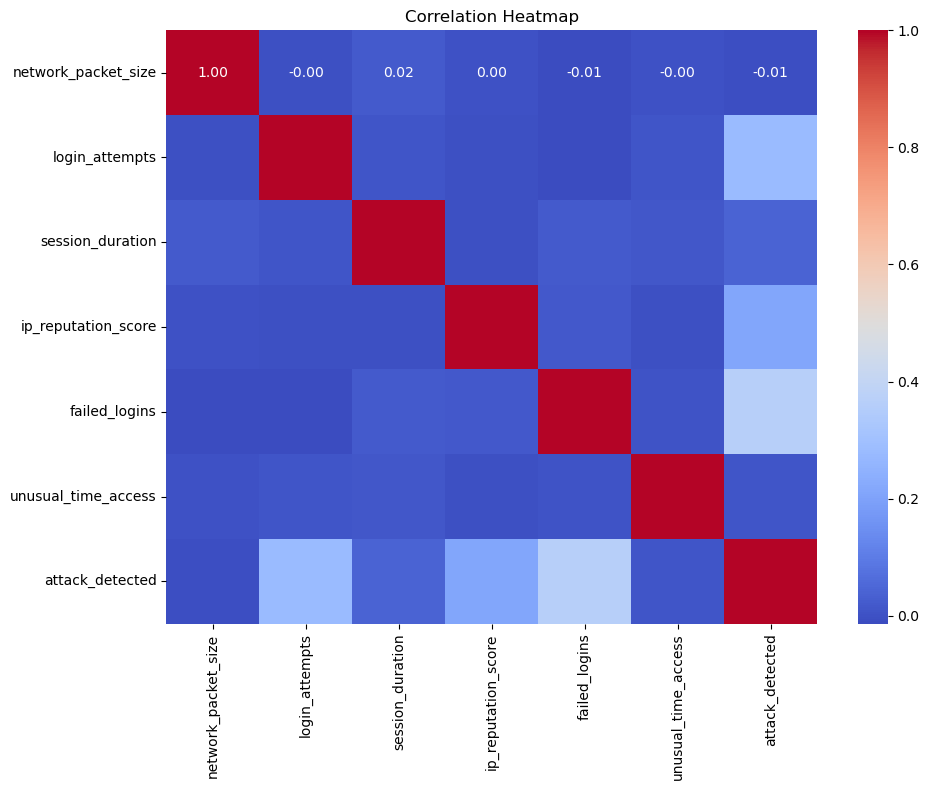

In [6]:
# Visual 1: Correlation Heatmap (only if 4 or more numeric columns are available)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric data for a correlation heatmap.')

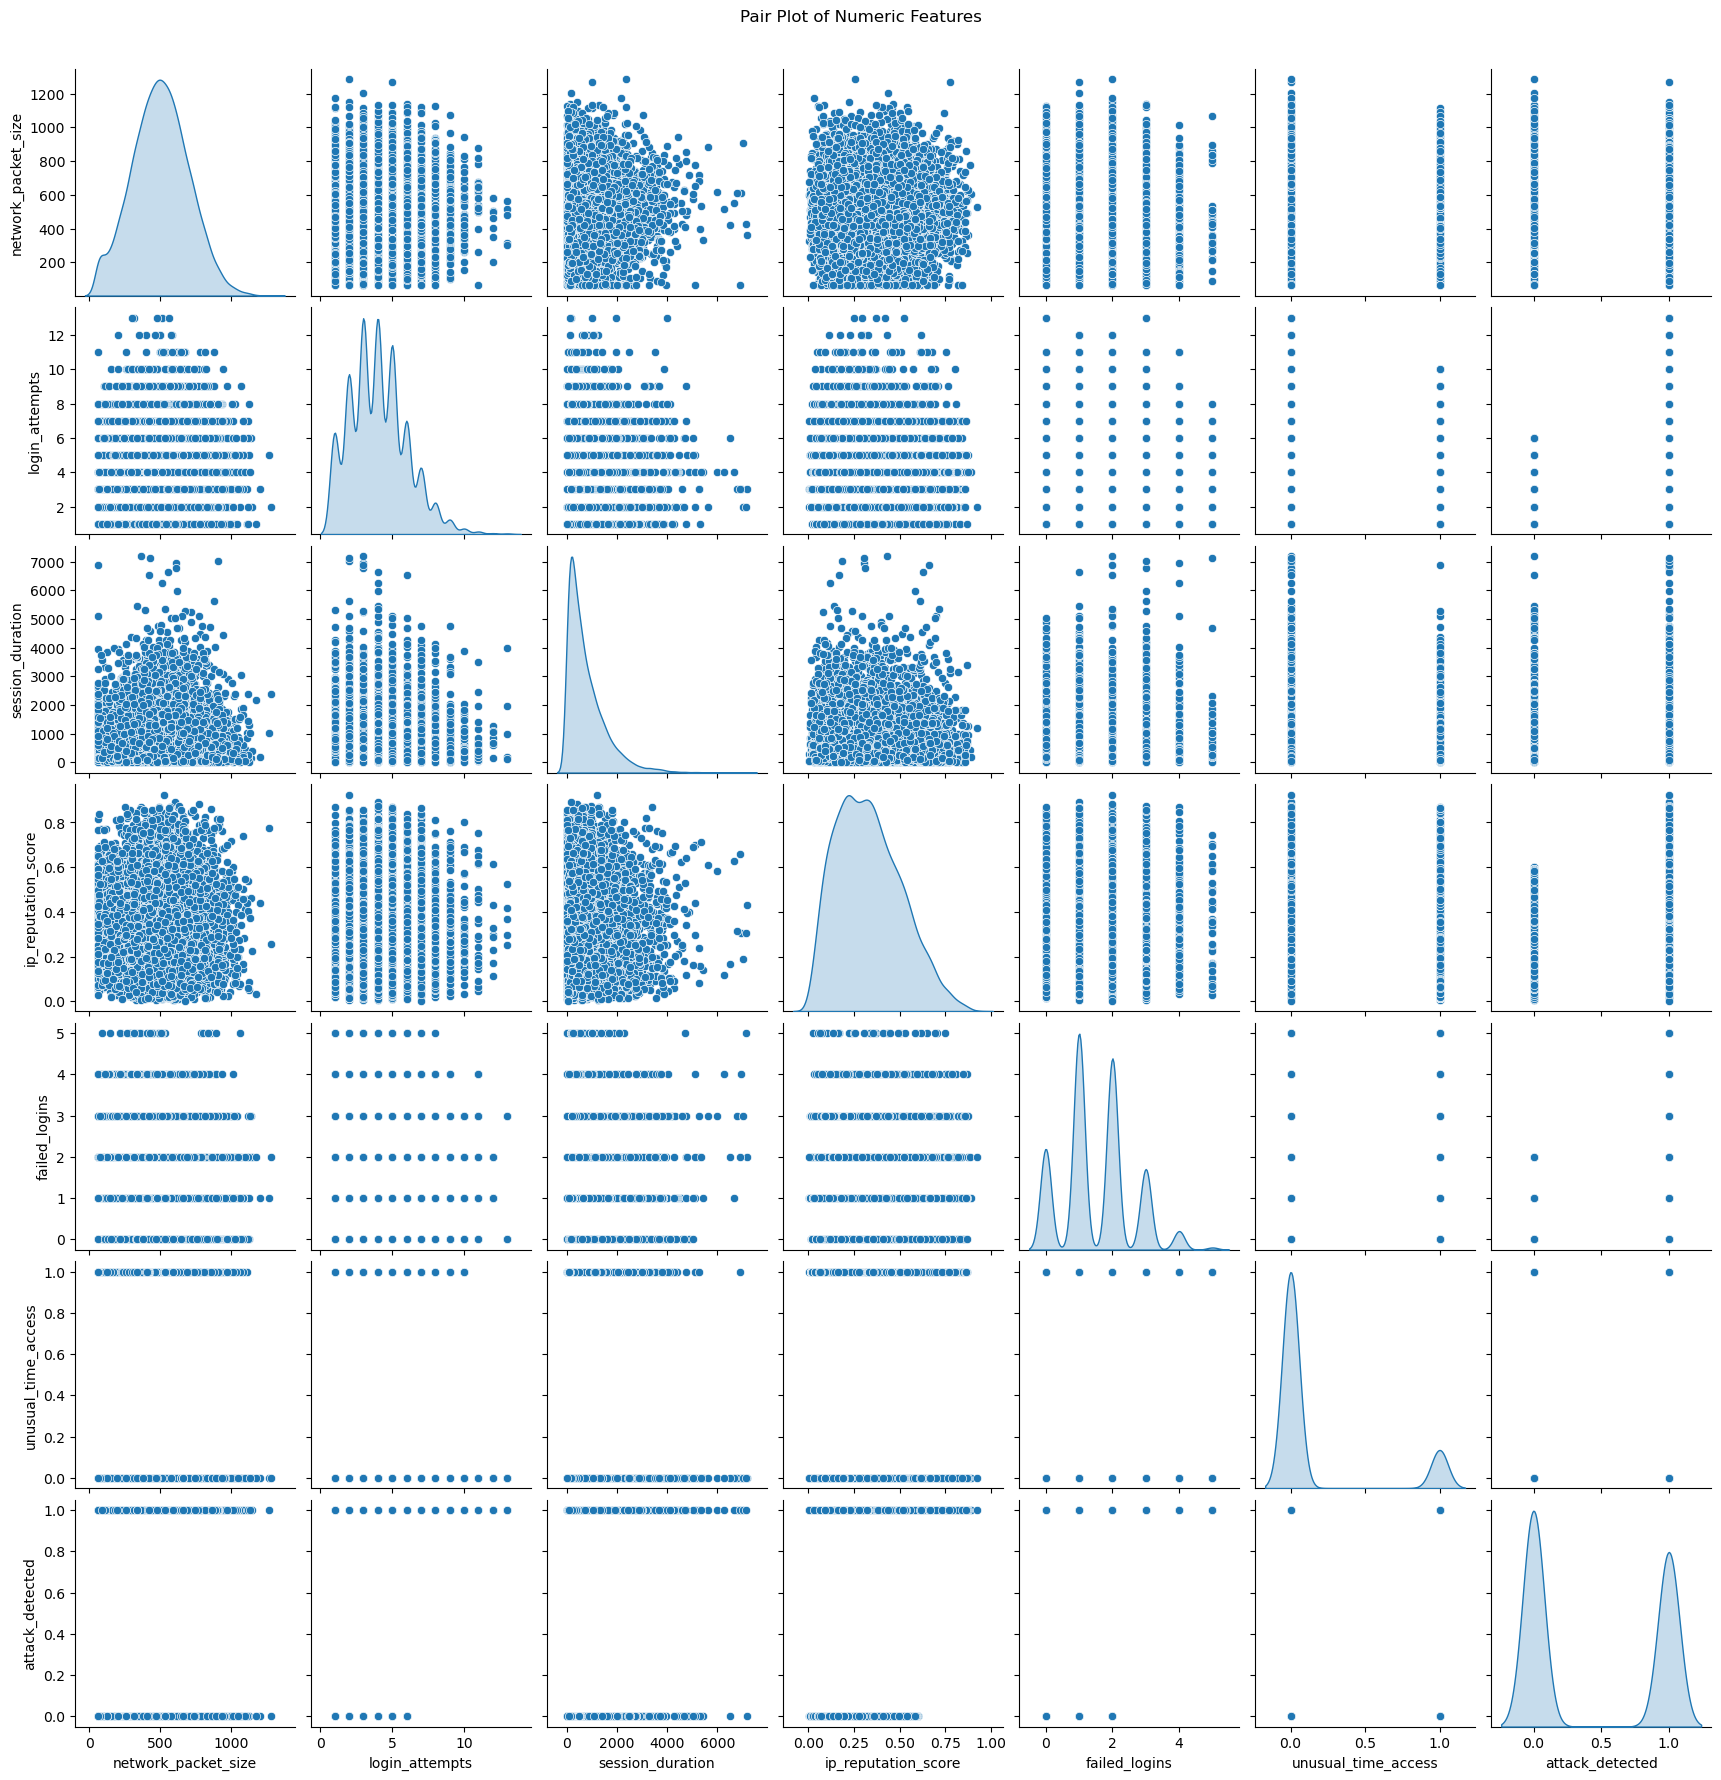

In [7]:
# Visual 2: Pair Plot for a quick multi-dimensional view
sns.pairplot(numeric_df, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

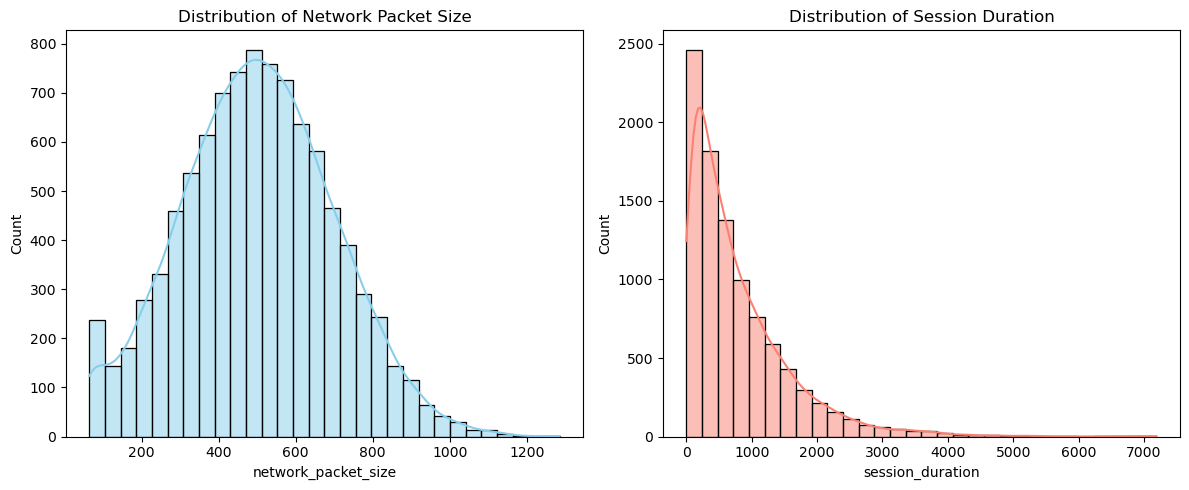

In [8]:
# Visual 3: Histograms of network packet size and session duration
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['network_packet_size'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Network Packet Size')

plt.subplot(1, 2, 2)
sns.histplot(df['session_duration'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Session Duration')

plt.tight_layout()
plt.show()

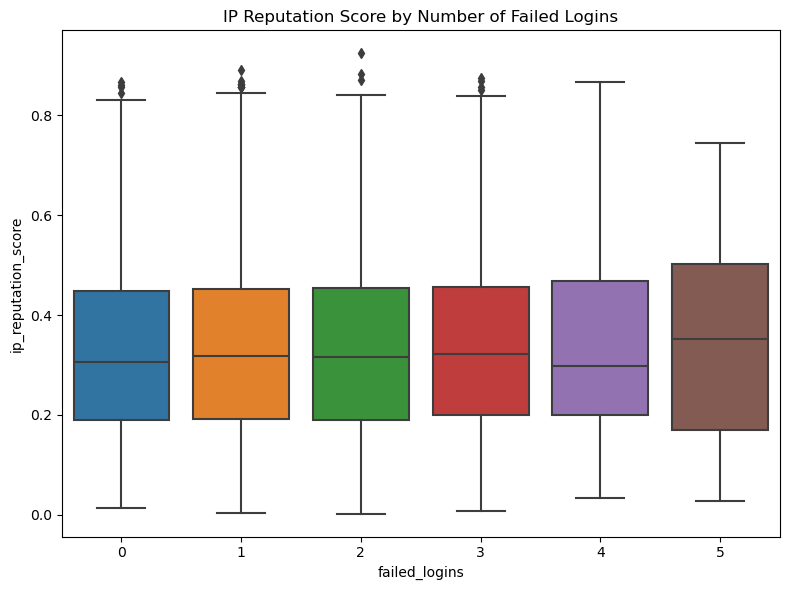

In [9]:
# Visual 4: Box Plot of ip_reputation_score vs. failed_logins
plt.figure(figsize=(8, 6))
sns.boxplot(x='failed_logins', y='ip_reputation_score', data=df)
plt.title('IP Reputation Score by Number of Failed Logins')
plt.tight_layout()
plt.show()

## Model Training and Evaluation

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Define X and y
if 'attack_detected' not in df.columns:
    raise ValueError('Target variable "attack_detected" not found in the dataset.')

X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Deep Neural Network

In [ ]:
# ------- Model 1: Deep Neural Network (DNN) ------- #
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Evaluate DNN
dnn_preds = (dnn_model.predict(X_test) > 0.5).astype('int32')
print("\nDNN Classification Report:\n", classification_report(y_test, dnn_preds))

### Model 2: Recurrent Neural Network

In [ ]:
# ------- Model 2: Recurrent Neural Network (RNN - LSTM) ------- #
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

rnn_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

In [ ]:
# Evaluate RNN
rnn_preds = (rnn_model.predict(X_test_rnn) > 0.5).astype('int32')
print("\nRNN Classification Report:\n", classification_report(y_test, rnn_preds))

### Model 3: Gradient Boosting Machine

In [ ]:
# ------- Model 3: Gradient Boosting Machine (GBM - LightGBM) ------- #
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Evaluate GBM
gbm_preds = lgb_model.predict(X_test)
print("\nGBM Classification Report:\n", classification_report(y_test, gbm_preds))
